/tmp/ipython-input-682815709.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Price_Category"], palette="Set2")


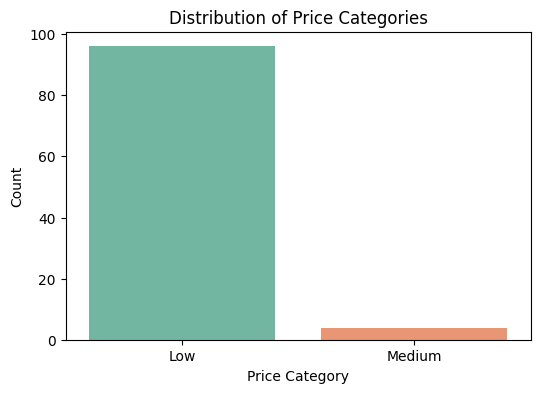

/tmp/ipython-input-682815709.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Month"], palette="coolwarm")


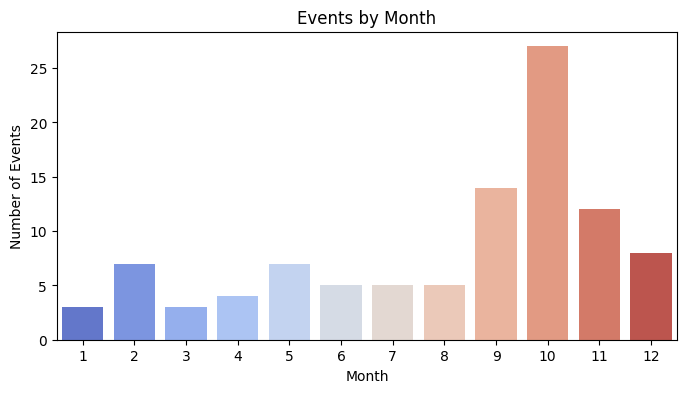

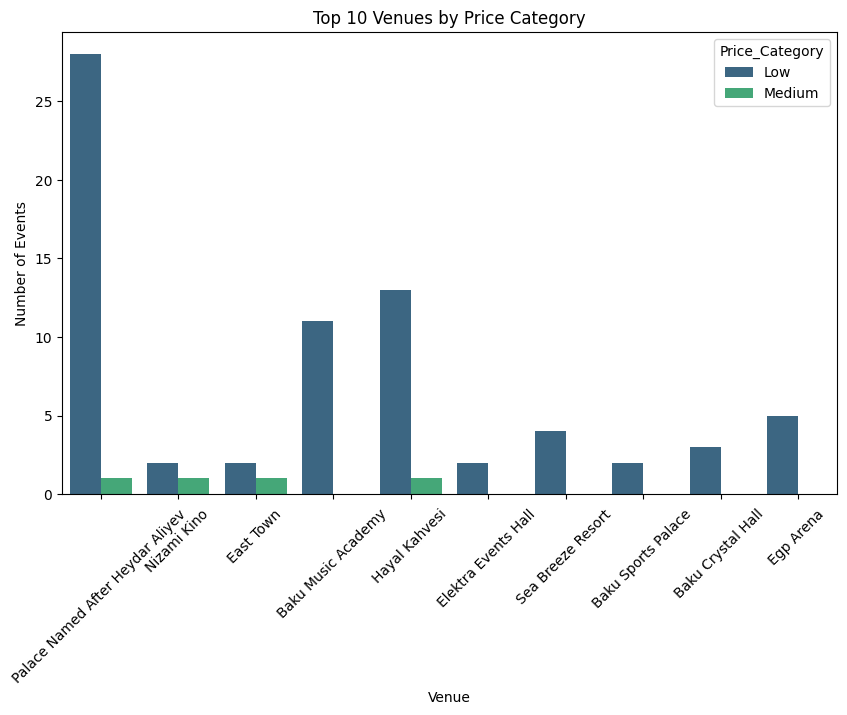

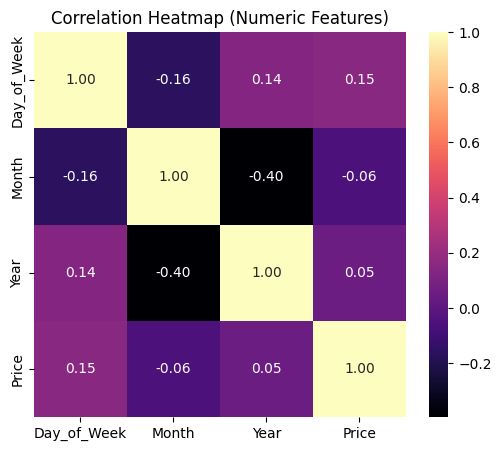

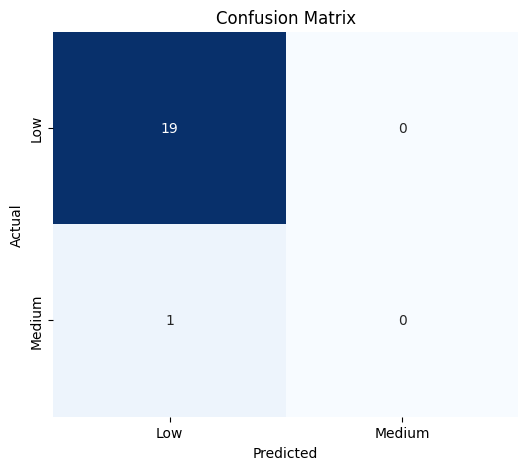

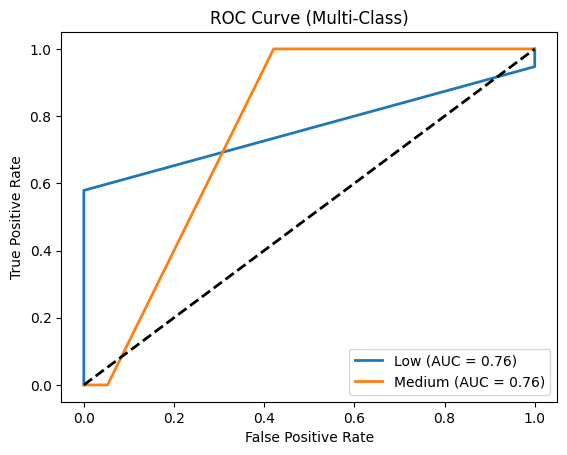

/tmp/ipython-input-682815709.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="cool")


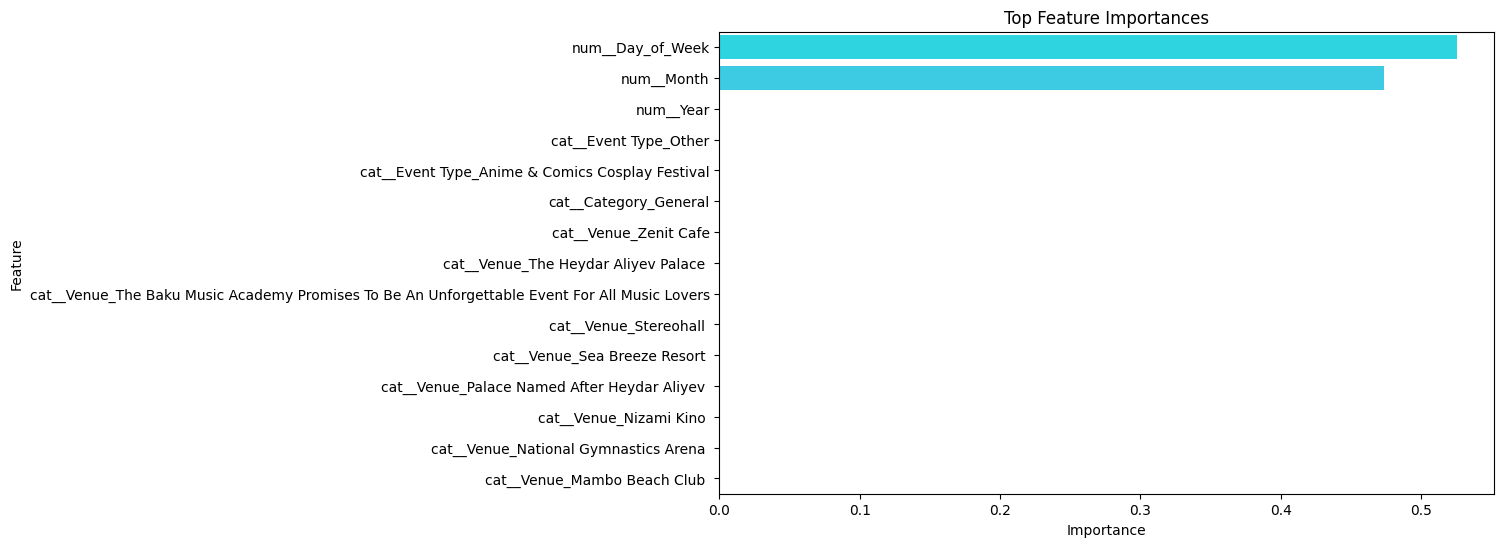

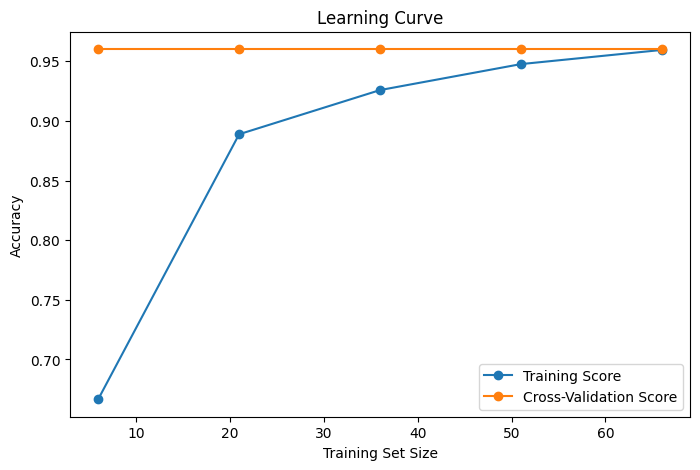

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:39:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:39:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:39:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:39:40] WARNING: /workspace/src/learner.cc:738: 
Para

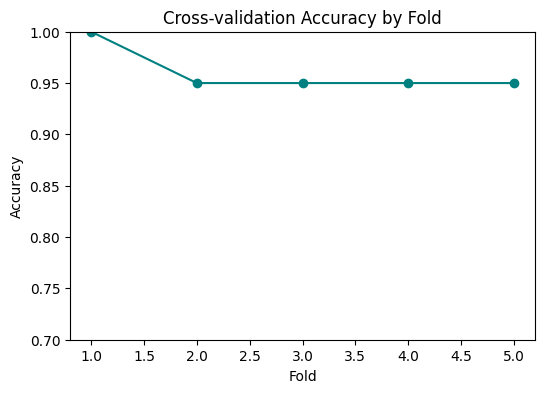

Cross-validation scores: [1.   0.95 0.95 0.95 0.95]
Mean CV Accuracy: 0.96


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import cross_val_score, learning_curve
import numpy as np

# --- Price Category Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(x=df["Price_Category"], palette="Set2")
plt.title("Distribution of Price Categories")
plt.xlabel("Price Category")
plt.ylabel("Count")
plt.show()

# --- Events by Month ---
plt.figure(figsize=(8,4))
sns.countplot(x=df["Month"], palette="coolwarm")
plt.title("Events by Month")
plt.xlabel("Month")
plt.ylabel("Number of Events")
plt.show()

# --- Venue vs Price Category (Top 10 venues) ---
top_venues = df["Venue"].value_counts().head(10).index
plt.figure(figsize=(10,6))
sns.countplot(data=df[df["Venue"].isin(top_venues)], x="Venue", hue="Price_Category", palette="viridis")
plt.title("Top 10 Venues by Price Category")
plt.xticks(rotation=45)
plt.ylabel("Number of Events")
plt.show()

# --- Correlation Heatmap (numeric features only) ---
plt.figure(figsize=(6,5))
sns.heatmap(df[["Day_of_Week","Month","Year","Price"]].corr(), annot=True, cmap="magma", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


# --- Confusion Matrix (prettier) ---
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- ROC Curve (One-vs-Rest) ---
y_score = best_model.predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i, label in enumerate(le.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test==i, y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f"{label} (AUC = {roc_auc[i]:.2f})")

plt.plot([0,1],[0,1],"k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

# --- Feature Importance (XGBoost) ---
xgb_model = best_model.named_steps["classifier"]
importances = xgb_model.feature_importances_
feature_names = best_model.named_steps["preprocessor"].get_feature_names_out()
sorted_idx = np.argsort(importances)[::-1][:15]  # top 15

plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="cool")
plt.title("Top Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# --- Learning Curve ---
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=3, n_jobs=-1, scoring="accuracy",
    train_sizes=np.linspace(0.1,1.0,5)
)
plt.figure(figsize=(8,5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), "o-", label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), "o-", label="Cross-Validation Score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# --- Cross-validation Scores Plot ---
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring="accuracy")
plt.figure(figsize=(6,4))
plt.plot(range(1,6), cv_scores, marker="o", color="teal")
plt.title("Cross-validation Accuracy by Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.7,1.0)
plt.show()

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
